Shape of dataset: (178, 13)
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Explained variance ratio for all components:
 [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

Number of components required to explain at least 95% variance: 10


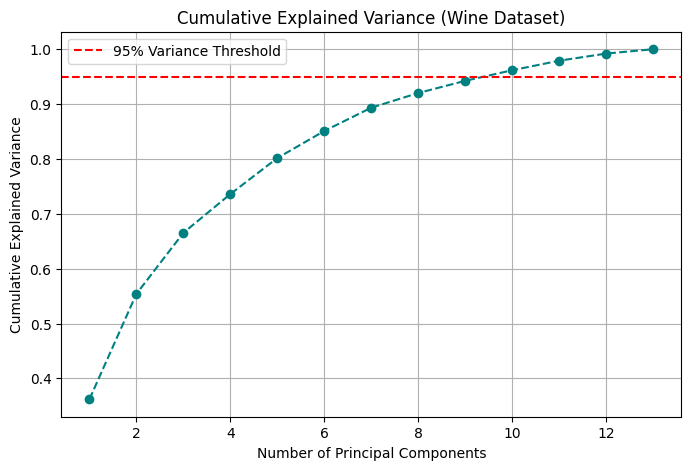

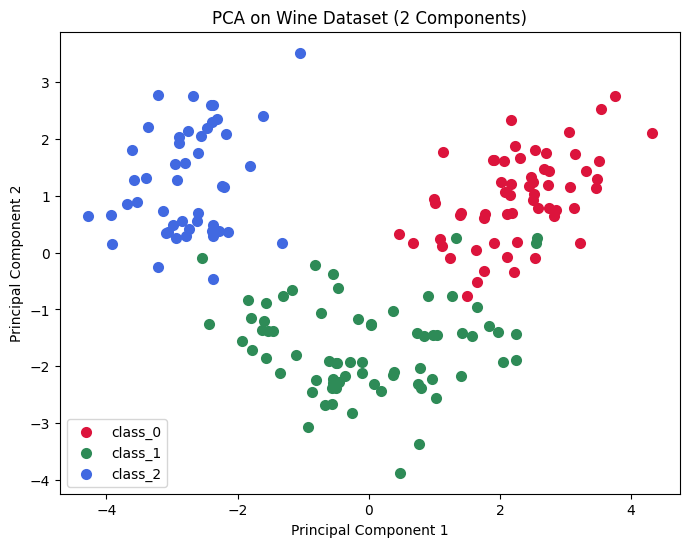


Explained variance ratio (2 components): [0.36198848 0.1920749 ]


In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names
feature_names = wine.feature_names

print("Shape of dataset:", X.shape)
print("Feature names:", feature_names)

# Step 3: Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 4: Apply PCA to compute explained variance
pca = PCA()
X_pca = pca.fit_transform(X_std)

# (a) Explained variance ratio for all components
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained variance ratio for all components:\n", explained_variance_ratio)

# (b) Determine how many components explain at least 95% variance
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components required to explain at least 95% variance: {n_components_95}")

# Step 5: Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='teal')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title("Cumulative Explained Variance (Wine Dataset)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Reduce data to 2 principal components
pca_2d = PCA(n_components=2)
X_reduced = pca_2d.fit_transform(X_std)

# Step 7: Visualize 2D PCA results
plt.figure(figsize=(8,6))
colors = ['crimson', 'seagreen', 'royalblue']

for color, target_name, i in zip(colors, target_names, [0, 1, 2]):
    plt.scatter(
        X_reduced[y == i, 0],
        X_reduced[y == i, 1],
        color=color,
        lw=2,
        label=target_name
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Wine Dataset (2 Components)")
plt.legend()
plt.show()

# Step 8: Print explained variance of 2 components
explained_var_2 = pca_2d.explained_variance_ratio_
print("\nExplained variance ratio (2 components):", explained_var_2)